<a href="https://colab.research.google.com/github/sagnik765/Face-Detection/blob/main/Face_Detection_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [4]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [5]:
X = lfw_people.data
shape=X.shape
n_features = X.shape[1]
print(shape)
print(n_features)

(1288, 1850)
1850


In [6]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print(y)
print(target_names)

[5 6 3 ... 5 3 5]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [7]:
print("Total dataset size:")
print("n_samples: ", n_samples)
print("n_features: ", n_features)
print("n_classes: ", n_classes)

Total dataset size:
n_samples:  1288
n_features:  1850
n_classes:  7


Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [9]:
n_components = 50
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [10]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [11]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)


Fitting the classifier to the training set


Model Prediction

In [13]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [14]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.70      0.70        20
     Colin Powell       0.85      0.88      0.87        52
  Donald Rumsfeld       0.84      0.76      0.80        34
    George W Bush       0.89      0.92      0.91       129
Gerhard Schroeder       0.74      0.69      0.71        29
      Hugo Chavez       0.81      0.76      0.79        17
       Tony Blair       0.76      0.76      0.76        41

         accuracy                           0.84       322
        macro avg       0.80      0.78      0.79       322
     weighted avg       0.83      0.84      0.83       322



In [15]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
   
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

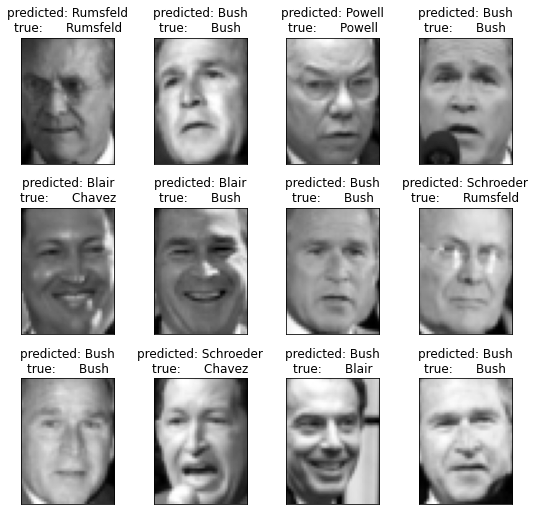

In [16]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

Evaluating the Model

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8354037267080745
